# Hough Transform

## What is Hough transform?

- How to find lines given a set of points (edges) detected.
- Given a set of points, search for lines that enough (more than a threshold) points lie on.
    
![line_1](line_1.png)

![line_2](line_2.png)

## Line to Hough space

![Hough_1](hough_1.png)

## Line to Hough space

![hough_2](hough_2.png)

## Point to Hough space

![hough_3](hough_3.png)

## Point to Hough space

![hough_4](hough_4.png)

## Points (line) to Hough space

![hough_5](hough_5.png)

## Points (line) to Hough space

![hough_6](hough_6.png)

![hough_7](hough_7.png)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


def draw_lines(img, houghLines, color=[0, 255, 0], thickness=1):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


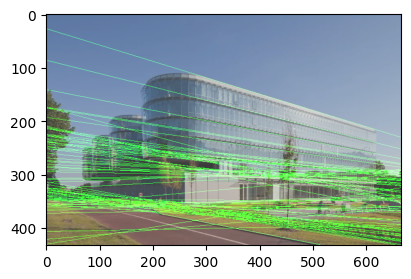

In [2]:
image = mpimg.imread("test_image.png")
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# image = cv2.GaussianBlur(image, (9, 9), 0)

edges = cv2.Canny((image_gray*255).astype(np.uint8), 50, 120)
hough_lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=220)

image_draw = np.zeros_like(image)
draw_lines(image_draw, hough_lines)
image_draw = weighted_img(image_draw, image)

plt.figure(figsize=(5, 3))
plt.imshow(image_draw)
plt.show()


# ControlNet

![control_1](controlnet_1.png)

## What is ControlNet?

### - Trainable module that can adjust Diffusion models (Stable Diffusion) to be conditioned on image-like conditions (or controls).
- Further controls over text!

### - Canny edges, Hough lines, user scribbles, huma key points, segmentation map, shape normals, depths, etc.

![controlnet_2](controlnet_2.png)

![controlnet_3](controlnet_3.png)

![controlnet_4](controlnet_4.png)

## Advantages of ControlNet?

### - Number of finetuning samples are very flexible.

### - Given computer vision techniques (detectors), can collect enough number of samples to train ControlNet module easily.